## **Explorando IA Generativa em um Pipeline de ETL com Python**

O projeto visa demonstrar a integração de modelos de IA generativa em um pipeline clássico de ETL (Extract, Transform, Load) utilizando Python, com foco didático e experimental. O objetivo é ilustrar como técnicas modernas de IA podem enriquecer, automatizar e qualificar etapas tradicionais de ciencia de dados.

No estágio de extração, o pipeline coleta dados em arquivo CSV. Em seguida, na fase de transformação, a IA generativa (Gemini 2.5) é utilizada para tarefas avançadas, como:

* Enriquecimento semântico de dados textuais
* geração de orientação à partir dos dados iniciais

Por fim, na etapa de carga, os dados transformados são armazenados em um repositório final (GitHub)

# **Coach digital para atletas de Jiu jitsu**
   
 *  Objetivo principal: determinar pontos à melhorar nos combates
 *  Objetivo secundário: descrever vantagens competitivas do atleta





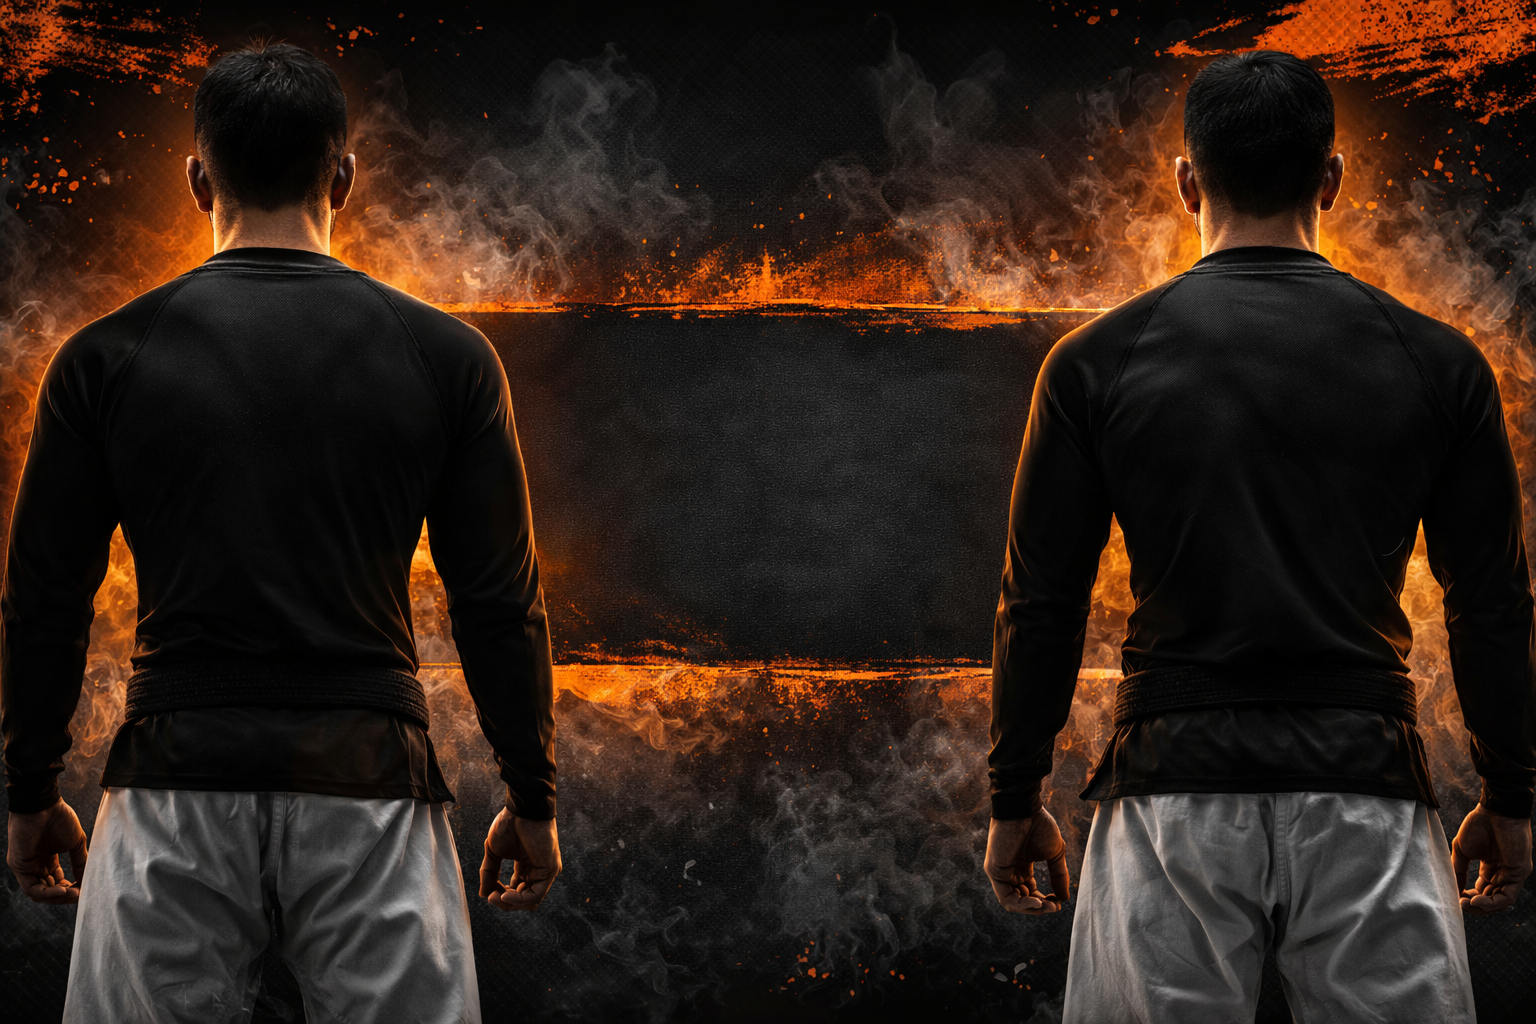

 **Descrição**: Este projeto propõe o desenvolvimento de um coach digital para atletas de Jiu-Jitsu, baseado em análise de dados de combates e características do atleta. O objetivo principal é identificar pontos de melhoria no desempenho competitivo, por meio da detecção de padrões técnicos e táticos associados a falhas ou ineficiências durante as lutas. Como objetivo secundário, o sistema busca descrever as vantagens competitivas do atleta, destacando técnicas, posições e comportamentos com maior taxa de sucesso. A proposta integra conceitos de ciência de dados e análise de desempenho esportivo, com caráter exploratório, visando apoiar treinadores e atletas na tomada de decisão, sem substituir a avaliação humana.

**Fase 1:** Extração dos dados dos atletas
   - Simulando a coleta de dados por input do usuário em formulário (google sheet)
   - Dados serão consumido da api do google no formato de arquivo .csv, onde as observações foram criadas de maneira aleatória usando LLM (simulando o preenchimento)
   - Dados foram armazenados no Google Drive
   Como referência foi fornecido duas referência da *International Brazilian Jiu-Jitsu Federation* (IBJJF):
   * Livro de regras e faltas

[Site IBJJF] (https://ibjjf.com/books-videos)

*Poderiamos utilizar

In [2]:
# Importanto bibliotecas #
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import ipywidgets as widgets
from IPython.display import display, clear_output



In [3]:
# carregando os dados
url = "https://drive.google.com/uc?export=download&id=1lphf-veG30G3QcKY6ojJQFgCMuFbidX-"

df = pd.read_csv(url)
print(df.head(7)) ### visualizando os dados


   id        nome categoria_peso  idade     graduacao pais_origem  \
0   1  Atleta_001          Pluma     18  Faixa Marrom         EUA   
1   2  Atleta_002           Galo     20    Faixa Roxa         EUA   
2   3  Atleta_003    Meio-Pesado     18    Faixa Roxa      Itália   
3   4  Atleta_004   Super-Pesado     21  Faixa Marrom       Japão   
4   5  Atleta_005    Meio-Pesado     38  Faixa Marrom      França   
5   6  Atleta_006   Super-Pesado     26   Faixa Preta      Itália   
6   7  Atleta_007           Leve     35    Faixa Roxa         EUA   

   vitorias_campeonato  derrotas_campeonato  posicao_ranking  pct_pontos  \
0                   33                    8               95          40   
1                   69                   38                4          78   
2                   59                   21               36          52   
3                   49                   38               34          75   
4                   29                    4                6       

**Fase 2:** Transformação dos dados
- Enriquecimento dos dados com API do GEMINI, ou seja, respondendo os dois objetivos/perguntas

In [4]:
!pip install google-generativeai pandas
!pip install google-generativeai ipywidgets
## instalando bibliotecas da google



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


In [5]:
#### Configuracao da chave da API (chave oculta)

from google.colab import userdata
import google.generativeai as genai

genai.configure(
    api_key=userdata.get("GEMINI")
)



/usr/local/lib/python3.12/dist-packages/google/colab/_import_hooks/_hook_injector.py:55: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  loader.exec_module(module)


In [6]:
#### chamndo o modelo e definindo a funcao e prompt
model = genai.GenerativeModel("gemini-2.5-flash")

def enriquecer_atleta(dados_atleta: dict, delay=2):
    prompt = f"""
Você é um coach digital especializado em Jiu-Jitsu competitivo.

Objetivo principal:
- Identificar pontos a melhorar nos combates do atleta.

Objetivo secundário:
- Descrever vantagens competitivas do atleta.

Com base EXCLUSIVAMENTE nos dados abaixo, gere um resumo em exatamente 4 bullets curtos, claros e técnicos, em português.

Regras obrigatórias:
- Use apenas as informações fornecidas.
- Não invente dados, histórico ou contexto externo.
- Não utilize linguagem motivacional.
- Cada bullet deve ter no máximo 2 linhas.
- Não numere os bullets.
- Seja objetivo, técnico e consistente entre atletas.
- Não inclua texto fora dos bullets.

Formato de saída (EXATAMENTE neste formato):
- Estilo competitivo: ...
- Pontos a melhorar: ...
- Vantagens competitivas: ...
- Direcionamento de treino: ...

Dados do atleta:
id: {dados_atleta.get("id")}
categoria_peso: {dados_atleta.get("categoria_peso")}
idade: {dados_atleta.get("idade")}
graduacao: {dados_atleta.get("graduacao")}
pais_origem: {dados_atleta.get("pais_origem")}
vitorias_campeonato: {dados_atleta.get("vitorias_campeonato")}
derrotas_campeonato: {dados_atleta.get("derrotas_campeonato")}
posicao_ranking: {dados_atleta.get("posicao_ranking")}
pct_pontos: {dados_atleta.get("pct_pontos")}
pct_finalizacao: {dados_atleta.get("pct_finalizacao")}
modalidade_favorita: {dados_atleta.get("modalidade_favorita")}
finalizacao_mais_frequente: {dados_atleta.get("finalizacao_mais_frequente")}
finalizacao_favorita: {dados_atleta.get("finalizacao_favorita")}
posicionamento_favorito: {dados_atleta.get("posicionamento_favorito")}
nivel_atleta: {dados_atleta.get("nivel_atleta")}
"""

    try:
        resposta = model.generate_content(prompt)
        time.sleep(delay)
        return resposta.text.strip()
    except Exception:
        return "Erro ao gerar análise técnica."


In [7]:
# Criar colunas e criando botoes para input de pedido de analise
if "analise_tecnica" not in df.columns:
    df["analise_tecnica"] = None

if "status_analise" not in df.columns:
    df["status_analise"] = False

# Widget
input_nome = widgets.Text(
    description="Atleta:",
    placeholder="Digite o nome do atleta"
)

botao = widgets.Button(
    description="Gerar análise",
    button_style="primary"
)

saida = widgets.Output()

def on_botao_click(b):
    with saida:
        clear_output()
        nome = input_nome.value.strip()

        if not nome:
            print("Digite o nome do atleta.")
            return

        # Filtra atleta
        atleta = df[df["nome"].str.lower() == nome.lower()]

        if atleta.empty:
            print("Atleta não encontrado.")
            return

        # Se já processado, mostra a análise
        if atleta.iloc[0]["status_analise"]:
            print("Análise já realizada para este atleta:\n")
            print(atleta.iloc[0]["analise_tecnica"])
            return

        # Gera análise
        print("Consultando análise técnica...\n")
        analise = enriquecer_atleta(atleta.iloc[0].to_dict())

        # Atualiza DataFrame na hora
        idx = atleta.index[0]
        df.at[idx, "analise_tecnica"] = analise
        df.at[idx, "status_analise"] = True

        # Salva incrementalmente
        df.to_csv("atletas_enriquecidos.csv", index=False)

        print("Análise técnica gerada e armazenada com sucesso!\n")
        print(analise)

botao.on_click(on_botao_click)

display(input_nome, botao, saida)



Text(value='', description='Atleta:', placeholder='Digite o nome do atleta')

Button(button_style='primary', description='Gerar análise', style=ButtonStyle())

Output()

**Fase 3:** Carregamento de dados transformados
- Após a solicitação de análise, o resultado é inserido no dataframe inicial, um atleta por
 vez, possibilitando assim baixo custo de uso de API e maior velocidade.
- Cada análise armazenada é salva novamente no google drive, atualizando os dados (CSV).


In [9]:
# 1. Monta o disco virtual
from google.colab import drive
drive.mount('/content/drive')

# 2. O caminho para salvar SEMPRE começa assim:
# /content/drive/MyDrive/ + o nome do seu arquivo
caminho = '/content/drive/MyDrive/atletas_jiujitsu_300.csv'

# 3. Salva e atualiza
df.to_csv(caminho, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
